# 붓꽃 다중 딥러닝
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#!gdown https://raw.githubusercontent.com/devdio/datasets/main/iris.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/iris.csv
To: /content/iris.csv
5.11kB [00:00, 7.56MB/s]       


In [26]:
iris = pd.read_csv("/content/iris.csv")
iris.shape

(150, 6)

In [42]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']

In [44]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [45]:
y = y.map({'Iris-setosa':0,
                       'Iris-versicolor':1,
                       'Iris-virginica':2})
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [46]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=2022)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
# y_train = y_train.values
# y_test = y_test.values

## 딥러닝 모델

In [82]:
# 다중분류일 경우, 타겟을 one-hot-encoding 할 필요
from tensorflow.keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_train_o[:5]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [83]:
model = keras.Sequential([
    layers.Dense(units=64, activation='relu', input_shape=(4,)),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['acc']
)

In [84]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                320       
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 200
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_o,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = 0.2,
                    verbose = 1)

In [86]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

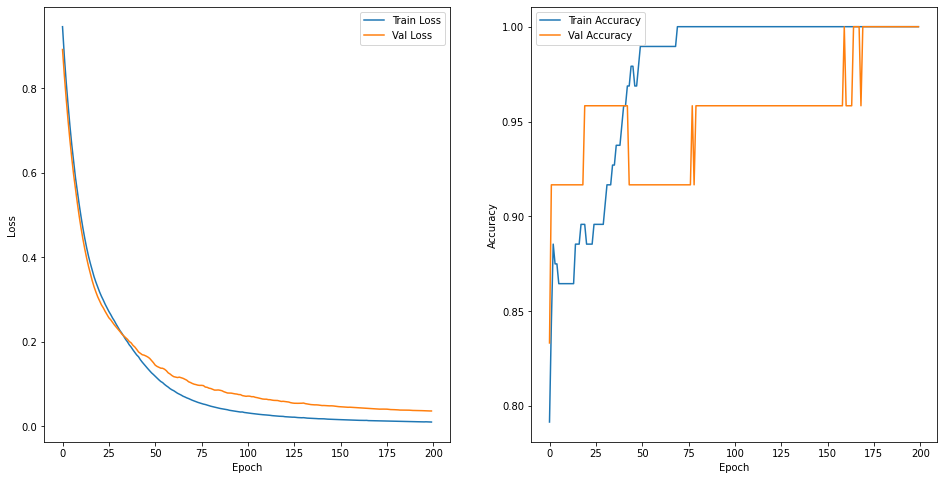

In [87]:
plot_history(history)

In [92]:
model.evaluate(X_train_s, y_train_o)

4/4 [==============================] - 0s 6ms/step - loss: 0.0153 - acc: 1.0000


[0.015267272479832172, 1.0]

In [93]:
y_test_o = to_categorical(y_test)

In [94]:
model.evaluate(X_test_s, y_test_o)

1/1 [==============================] - 0s 20ms/step - loss: 0.2033 - acc: 0.9333


[0.2033161073923111, 0.9333333373069763]

## 예측

In [97]:
y_pred = model.predict(X_test_s)
y_pred[:6]

1/1 [==============================] - 0s 27ms/step


array([[1.9570148e-06, 4.7274654e-05, 9.9995071e-01],
       [9.9976993e-01, 2.2369139e-04, 6.2719109e-06],
       [8.2306482e-04, 4.1566813e-01, 5.8350879e-01],
       [4.9904664e-04, 9.9316543e-01, 6.3355002e-03],
       [9.9967563e-01, 3.2164445e-04, 2.7674384e-06],
       [9.9985266e-01, 1.4398851e-04, 3.3735853e-06]], dtype=float32)

In [99]:
y_test_o[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [100]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 0, 2])

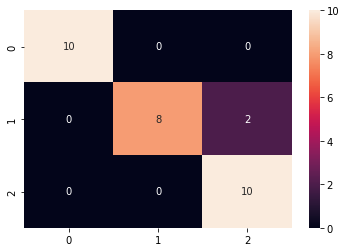

In [101]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True)